##### 샘플 데이터

lg thinq 앱 플레이스토어 리뷰 크롤링

In [2]:
import pandas as pd

In [7]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00


In [8]:
# Excel 파일 경로
excel_file_path = './data/헬스케어.xls'

# 변환할 CSV 파일 경로
csv_file_path = './data/헬스케어.csv'

# Excel 파일 읽기
df = pd.read_excel(excel_file_path)

# CSV 파일로 저장
df.to_csv(csv_file_path, index=False)

In [9]:
df = pd.read_csv(csv_file_path)
df.head()

,time,review
0,2023. 5. 3. 11:52,좋은시와 글 홈트를 해요 영원한 물론입니다 여러분과 함께 홈트를 즐길 수 있는 영상...
1,2023. 5. 3. 10:02,뭘써볼까 는 집에서 틈틈이 운동하기 위해 홈트용 운동기구를 애요해요 꾸준히 하는 나...
2,2023. 5. 3. 9:01,주절주절 홈트를 해요 대 필수 매일 조금씩 세 줌마입니다 대 필수라고 생각하는 근...
3,2023. 2. 23. 19:00,건강 관리는 꾸준한 운동이 정답인것 같아요 건강 관리는 꾸준한 운동이 정답인것 같...
4,2021. 11. 10. 10:00,안녕 운동 운동 운동은매일매일출퇴근을 자전거로 해요분정도전력질주는 아니구요그리고 ...


In [16]:
# df['Review'] = df['review']
# df.drop(labels='review',axis=1, inplace = True)
# df

,time,Review
0,2023. 5. 3. 11:52,좋은시와 글 홈트를 해요 영원한 물론입니다 여러분과 함께 홈트를 즐길 수 있는 영상...
1,2023. 5. 3. 10:02,뭘써볼까 는 집에서 틈틈이 운동하기 위해 홈트용 운동기구를 애요해요 꾸준히 하는 나...
2,2023. 5. 3. 9:01,주절주절 홈트를 해요 대 필수 매일 조금씩 세 줌마입니다 대 필수라고 생각하는 근...
3,2023. 2. 23. 19:00,건강 관리는 꾸준한 운동이 정답인것 같아요 건강 관리는 꾸준한 운동이 정답인것 같...
4,2021. 11. 10. 10:00,안녕 운동 운동 운동은매일매일출퇴근을 자전거로 해요분정도전력질주는 아니구요그리고 ...
...,...,...
761,2021. 11. 10. 12:41,끄적끄적 운동 영상사무실의자에 앉아서 다리 운동 는 운동하는 모습을 타임랩스로 해...
762,2022. 5. 18. 11:46,자연 하늘 힐링 무드 남기기 습관처럼 매일 꾸준히 하는 일은 무엇인가요 매일 해둔 ...
763,2022. 7. 14. 0:53,대화하기 질문 답변 이라전 단식 안해요잘 먹고 건강한 게 최고적당히 먹으면 건강해질...
764,2022. 11. 1. 7:30,나는 헬스장에 오면근육 워밍업으로 정확히 를 뛴다그리고 무산소 운동을 시작한다근육...


# ◆ 1. 데이터 전처리하기
* 1.1. 특수문자 및 숫자 제거
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [10]:
import re
from tqdm import tqdm

In [5]:
pattern = r'[^a-xA-Z0-9가-힣\s\.\?\!]'
text = "Hi 안녕, hello!?☆"
re.sub(pattern, "", text)

'Hi 안녕 hello!?'

In [17]:
pattern = r'[^a-xA-Z0-9가-힣\s\.\?\!]'
new_review = []
for i in tqdm(df.Review) :
    text = re.sub(pattern, "", i)
    new_review.append(text)
df['Review'] = new_review

100%|██████████| 766/766 [00:00<00:00, 149796.57it/s]


### 1.2. 의미없는 짧은 글 제거

In [18]:
for i, review in enumerate(tqdm(df.Review)) : # enumerate : for문에서 index를 같이 보고 싶을 때 (i : rem 값, review : text)
    if len(review) < 15 :
        df = df.drop([i])

100%|██████████| 766/766 [00:00<?, ?it/s]


# ◆ 2. 데이터 형태소 분리하기
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

In [19]:
from konlpy.tag import Okt
okt=Okt()

### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv)

In [20]:
stopwords_DF = pd.read_csv("./data/ko-stopwords.csv")
stopwords = list(stopwords_DF['stopwords']) # == stropwords_df.stropwords
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [21]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem = True, norm = True)

    tagged_list = []
    for word, tag in pos_words :
        if tag in ['Noun', 'Adjective', 'Verb'] :
            if word not in stopwords :
                tagged_list.append(word)
    return tagged_list

In [22]:
okt_pos_tagging(df['Review'][0])

['좋다',
 '은시',
 '글',
 '홈트',
 '해',
 '영원하다',
 '홈트',
 '즐기다',
 '수',
 '영상',
 '준비',
 '영상',
 '전신',
 '강화하다',
 '수',
 '운동',
 '기구',
 '근력',
 '운동',
 '유',
 '산소',
 '운동',
 '다양하다',
 '운동',
 '소개',
 '운동',
 '동작',
 '대한',
 '자세하다',
 '설명',
 '운동',
 '수행',
 '방법',
 '안내',
 '영상',
 '참고',
 '즐겁다',
 '운동',
 '보다',
 '영상',
 '운동',
 '매트',
 '바벨',
 '덤벨',
 '케틀벨',
 '활용',
 '다양하다',
 '전신',
 '운동',
 '수행',
 '운동',
 '대한',
 '설명',
 '운동',
 '효과',
 '수행',
 '방법',
 '안내',
 '처음',
 '운동',
 '시작',
 '분',
 '쉬다',
 '따르다',
 '수',
 '유',
 '산소',
 '운동',
 '대해',
 '서도',
 '소개',
 '산책',
 '러닝',
 '머신',
 '활용',
 '유',
 '산소',
 '운동',
 '진행',
 '취향',
 '맞다',
 '유',
 '산소',
 '운동',
 '선택',
 '즐겁다',
 '운동',
 '보다',
 '마지막',
 '운동',
 '후',
 '꼭',
 '스트레칭',
 '추천',
 '드리다',
 '스트레칭',
 '통해',
 '근육',
 '긴장',
 '풀다',
 '줌',
 '부상',
 '예방',
 '운동',
 '효과',
 '향상',
 '도움',
 '영상',
 '참고',
 '건강하다',
 '몸',
 '건강하다',
 '삶',
 '유지',
 '보다']

### 2.2 데이터 프레임에 추가

In [23]:
tagged_review = []
for review in tqdm(df['Review']) :
    tagged = okt_pos_tagging(review)
    tagged_review.append(tagged)

100%|██████████| 766/766 [00:25<00:00, 29.83it/s]


In [24]:
df['tagged_review'] = tagged_review
df

,time,Review,tagged_review
0,2023. 5. 3. 11:52,좋은시와 글 홈트를 해요 영원한 물론입니다 여러분과 함께 홈트를 즐길 수 있는 영상...,"[좋다, 은시, 글, 홈트, 해, 영원하다, 홈트, 즐기다, 수, 영상, 준비, 영..."
1,2023. 5. 3. 10:02,뭘써볼까 는 집에서 틈틈이 운동하기 위해 홈트용 운동기구를 애요해요 꾸준히 하는 나...,"[뭘, 써다, 보다, 늘다, 집, 틈틈이, 운동, 위해, 홈트용, 운동, 기구, 애..."
2,2023. 5. 3. 9:01,주절주절 홈트를 해요 대 필수 매일 조금씩 세 줌마입니다 대 필수라고 생각하는 근...,"[홈트, 해, 대다, 필수, 매일, 세, 줌마, 대다, 필수, 생각, 근력, 운동,..."
3,2023. 2. 23. 19:00,건강 관리는 꾸준한 운동이 정답인것 같아요 건강 관리는 꾸준한 운동이 정답인것 같...,"[건강, 관리, 꾸준하다, 운동, 정답, 건강, 관리, 꾸준하다, 운동, 정답, 먹..."
4,2021. 11. 10. 10:00,안녕 운동 운동 운동은매일매일출퇴근을 자전거로 해요분정도전력질주는 아니구요그리고 ...,"[안녕, 운동, 운동, 운동, 매일, 출퇴근, 자전거, 해, 분, 정도전, 질주, ..."
...,...,...,...
761,2021. 11. 10. 12:41,끄적끄적 운동 영상사무실의자에 앉아서 다리 운동 는 운동하는 모습을 타임랩스로 해...,"[운동, 영상, 사무실, 의자, 앉다, 다리, 운동, 늘다, 운동, 모습, 타임랩스..."
762,2022. 5. 18. 11:46,자연 하늘 힐링 무드 남기기 습관처럼 매일 꾸준히 하는 일은 무엇인가요 매일 해둔 ...,"[자연, 하늘, 힐링, 무드, 남다, 습관, 매일, 꾸준하다, 매일, 해, 두다, ..."
763,2022. 7. 14. 0:53,대화하기 질문 답변 이라전 단식 안해요잘 먹고 건강한 게 최고적당히 먹으면 건강해질...,"[대화, 질문, 답변, 이르다, 단식, 자다, 먹다, 건강하다, 게, 최고, 적당하..."
764,2022. 11. 1. 7:30,나는 헬스장에 오면근육 워밍업으로 정확히 를 뛴다그리고 무산소 운동을 시작한다근육...,"[헬스장, 오다, 근육, 워밍업, 정확하다, 뛰다, 무, 산소, 운동, 시작, 근육..."


# ◆ 3. 벡터화
* 3.1 doc2vec 준비(문서의 순서 매기기)
* 3.2 doc2vec 학습시키기
* 3.3 벡터 값 데이터 프레임에 추가

In [78]:
#import gensim 안될때 첫번째시도
# pip install --upgrade scipy
# pip install --upgrade gensim

#두번쨰시도
#pip install --upgrade numpy

In [17]:
!pip show scipy

Name: scipy
Version: 1.11.4
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: C:\Users\trainee122\anaconda3\Lib\site-packages
Requires: numpy
Required-by: datashader, gensim, imbalanced-learn, scikit-image, scikit-learn, statsmodels


In [25]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

### 3.1 doc2vec 준비

- word2vec은 단어 하나를 하나의 vector화
- doc2vec은 문서 하나를 하나의 vector화

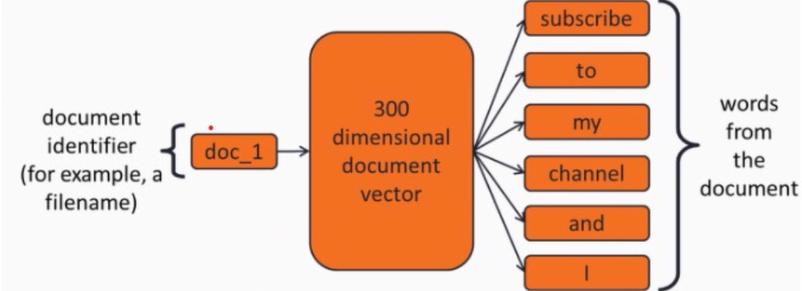

In [26]:
# doc2vector
tagged_corpus_lsit = []
for i, token in enumerate(df.tagged_review) :
    tag = f"document {i}"
    tagged_corpus_lsit.append(TaggedDocument(tags = [tag], words = token))

In [27]:
tagged_corpus_lsit[0]

TaggedDocument(words=['좋다', '은시', '글', '홈트', '해', '영원하다', '홈트', '즐기다', '수', '영상', '준비', '영상', '전신', '강화하다', '수', '운동', '기구', '근력', '운동', '유', '산소', '운동', '다양하다', '운동', '소개', '운동', '동작', '대한', '자세하다', '설명', '운동', '수행', '방법', '안내', '영상', '참고', '즐겁다', '운동', '보다', '영상', '운동', '매트', '바벨', '덤벨', '케틀벨', '활용', '다양하다', '전신', '운동', '수행', '운동', '대한', '설명', '운동', '효과', '수행', '방법', '안내', '처음', '운동', '시작', '분', '쉬다', '따르다', '수', '유', '산소', '운동', '대해', '서도', '소개', '산책', '러닝', '머신', '활용', '유', '산소', '운동', '진행', '취향', '맞다', '유', '산소', '운동', '선택', '즐겁다', '운동', '보다', '마지막', '운동', '후', '꼭', '스트레칭', '추천', '드리다', '스트레칭', '통해', '근육', '긴장', '풀다', '줌', '부상', '예방', '운동', '효과', '향상', '도움', '영상', '참고', '건강하다', '몸', '건강하다', '삶', '유지', '보다'], tags=['document 0'])

### 3.2 doc2vec 학습시키기

    <model 하이퍼파라미터 값>
    # vector_size : 생성할 문서 벡터의 크기
    # alpha: 모델 학습시 초기 학습률 0.025는 일반적으로 사용됨
    # min_alpha: 학습 과정에서 alpha 값을 이 값으로 줄여나가게 됩니다
    # window : 문맥 윈도우 크기, 주변 몇개의 단어의 문맥을 고려하여 학습하는가

In [28]:
model = doc2vec.Doc2Vec(vector_size = 100, alpha = 0.25, min_alpha = 0.025, window = 5)

In [29]:
model.build_vocab(tagged_corpus_lsit)

model.train(tagged_corpus_lsit, total_examples = model.corpus_count, epochs = 5)

### 3.3 벡터 값 데이터 프레임에 추가

In [30]:
model.dv["document 0"] # tagged_corpus_lsit[0] 의 한국어 데이터가 컴퓨터가 인식할 수 있도록 벡터값으로 표현

array([ 0.8202861 ,  1.2661822 ,  0.11358889,  1.4388651 ,  0.60046035,
       -0.3186156 ,  0.7847567 , -0.69844985,  0.06625431,  0.04082897,
       -0.03676897,  0.5259202 ,  0.8295263 ,  0.47859386, -2.006456  ,
        0.17595986, -0.1603443 , -1.6492666 , -0.22600237, -1.1343452 ,
        0.69869006,  0.34303442, -0.59805727, -0.3316112 , -0.71830326,
       -0.7846757 , -0.26946968, -0.46101144,  1.2191993 , -0.9456062 ,
        0.09059331,  1.1778877 , -0.82407916,  0.5185496 , -0.67779183,
       -0.46182302,  0.35915807, -0.21069896,  0.36400107, -0.05117832,
        0.7070576 , -0.18161336,  0.9639094 , -0.51169086,  0.8153973 ,
        0.9096498 ,  0.04810037, -0.25731978,  0.8851588 , -0.87210745,
       -0.03249331,  0.420024  ,  0.3344264 , -1.1706434 , -1.3806506 ,
        0.07241824, -1.2434741 , -0.03171201, -0.8347733 , -0.49001095,
        1.0108975 , -0.74173725,  0.49700123,  0.14183988, -0.7899065 ,
       -1.4213649 ,  0.24350761, -0.27986178, -1.1924901 , -0.81

In [32]:
# 벡터값 뽑압서 저장
vector_list = []
for i in range(len(df)) : # 각 인덱스 한번씩 돎
    doc2vec = model.dv[f"document {i}"]
    vector_list.append(doc2vec)

In [33]:
df['vector'] = vector_list
df

,time,Review,tagged_review,vector
0,2023. 5. 3. 11:52,좋은시와 글 홈트를 해요 영원한 물론입니다 여러분과 함께 홈트를 즐길 수 있는 영상...,"[좋다, 은시, 글, 홈트, 해, 영원하다, 홈트, 즐기다, 수, 영상, 준비, 영...","[0.8202861, 1.2661822, 0.11358889, 1.4388651, ..."
1,2023. 5. 3. 10:02,뭘써볼까 는 집에서 틈틈이 운동하기 위해 홈트용 운동기구를 애요해요 꾸준히 하는 나...,"[뭘, 써다, 보다, 늘다, 집, 틈틈이, 운동, 위해, 홈트용, 운동, 기구, 애...","[0.51687, -0.23826225, -0.48169875, 0.9579804,..."
2,2023. 5. 3. 9:01,주절주절 홈트를 해요 대 필수 매일 조금씩 세 줌마입니다 대 필수라고 생각하는 근...,"[홈트, 해, 대다, 필수, 매일, 세, 줌마, 대다, 필수, 생각, 근력, 운동,...","[0.6595078, 0.017418364, 1.2061758, 0.65224504..."
3,2023. 2. 23. 19:00,건강 관리는 꾸준한 운동이 정답인것 같아요 건강 관리는 꾸준한 운동이 정답인것 같...,"[건강, 관리, 꾸준하다, 운동, 정답, 건강, 관리, 꾸준하다, 운동, 정답, 먹...","[-0.286165, -0.0006382484, -0.51053077, -0.286..."
4,2021. 11. 10. 10:00,안녕 운동 운동 운동은매일매일출퇴근을 자전거로 해요분정도전력질주는 아니구요그리고 ...,"[안녕, 운동, 운동, 운동, 매일, 출퇴근, 자전거, 해, 분, 정도전, 질주, ...","[0.25458983, 0.1775183, -0.037466936, 0.238791..."
...,...,...,...,...
761,2021. 11. 10. 12:41,끄적끄적 운동 영상사무실의자에 앉아서 다리 운동 는 운동하는 모습을 타임랩스로 해...,"[운동, 영상, 사무실, 의자, 앉다, 다리, 운동, 늘다, 운동, 모습, 타임랩스...","[0.66145426, -0.26557165, 1.1865007, 1.541983,..."
762,2022. 5. 18. 11:46,자연 하늘 힐링 무드 남기기 습관처럼 매일 꾸준히 하는 일은 무엇인가요 매일 해둔 ...,"[자연, 하늘, 힐링, 무드, 남다, 습관, 매일, 꾸준하다, 매일, 해, 두다, ...","[-0.47089016, -1.0985899, -1.0741727, 0.038277..."
763,2022. 7. 14. 0:53,대화하기 질문 답변 이라전 단식 안해요잘 먹고 건강한 게 최고적당히 먹으면 건강해질...,"[대화, 질문, 답변, 이르다, 단식, 자다, 먹다, 건강하다, 게, 최고, 적당하...","[-0.24164252, -0.021301888, -0.21458848, 0.439..."
764,2022. 11. 1. 7:30,나는 헬스장에 오면근육 워밍업으로 정확히 를 뛴다그리고 무산소 운동을 시작한다근육...,"[헬스장, 오다, 근육, 워밍업, 정확하다, 뛰다, 무, 산소, 운동, 시작, 근육...","[0.4036357, 1.3256112, 0.5624539, 0.7470512, -..."


# ◆ 4. 병합 계층적 클러스터링
* 4.1 ward 기준으로 덴드로그램 그려보기
* 4.2 실루엣 지수 확인해서 토픽 갯수 정하기
* 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### 4.1 ward 기준으로 덴드로그램 그려보기

In [35]:
linked = linkage(list(df['vector']), "ward")

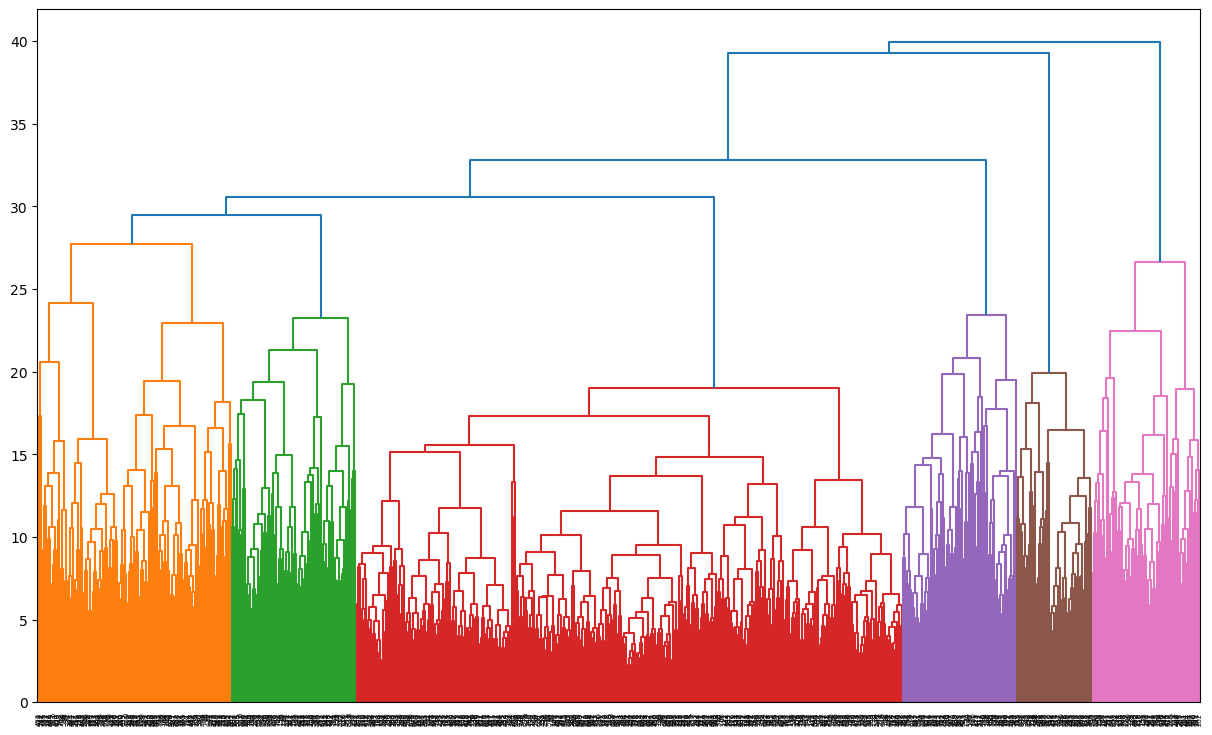

In [36]:
plt.figure(figsize=(15,9))
dendrogram(linked,
          orientation = 'top', #방향 위쪽으로그려짐
          distance_sort = 'descending', #내림차순 정렬
           show_leaf_counts=True )
plt.savefig('health_plot.png')
 
plt.show()

### 4.2 실루엣 지수 확인해서 토픽 갯수 정하기

In [1]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [38]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
cluster_label = cluster.fit_predict(list(df['vector']))

In [39]:
score = silhouette_score(list(df['vector']), cluster_label)
score

0.17600922

In [40]:
n_cluster = []
s_score = []

for i in tqdm(range(2, 30)) :
    cluster = AgglomerativeClustering(n_clusters = i, linkage = "ward")
    cluster_label = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_label)

    n_cluster.append(i)
    s_score.append(score)

100%|██████████| 28/28 [00:00<00:00, 36.61it/s]


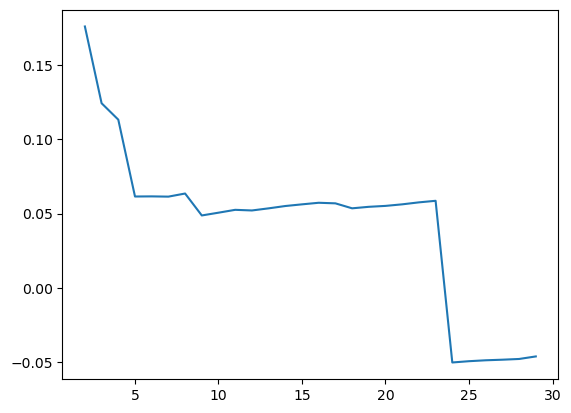

In [41]:
plt.plot(n_cluster, s_score)

In [42]:
result = pd.DataFrame({'n_cluster' : n_cluster,'score' : s_score})
result

,n_cluster,score
0,2,0.176009
1,3,0.124320
2,4,0.113268
3,5,0.061519
4,6,0.061606
5,7,0.061437
6,8,0.063530
7,9,0.048764
8,10,0.050626
9,11,0.052554


### 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [43]:
cluster = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
cluster_label = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_label
df.head()

,time,Review,tagged_review,vector,cluster
0,2023. 5. 3. 11:52,좋은시와 글 홈트를 해요 영원한 물론입니다 여러분과 함께 홈트를 즐길 수 있는 영상...,"[좋다, 은시, 글, 홈트, 해, 영원하다, 홈트, 즐기다, 수, 영상, 준비, 영...","[0.8202861, 1.2661822, 0.11358889, 1.4388651, ...",0
1,2023. 5. 3. 10:02,뭘써볼까 는 집에서 틈틈이 운동하기 위해 홈트용 운동기구를 애요해요 꾸준히 하는 나...,"[뭘, 써다, 보다, 늘다, 집, 틈틈이, 운동, 위해, 홈트용, 운동, 기구, 애...","[0.51687, -0.23826225, -0.48169875, 0.9579804,...",4
2,2023. 5. 3. 9:01,주절주절 홈트를 해요 대 필수 매일 조금씩 세 줌마입니다 대 필수라고 생각하는 근...,"[홈트, 해, 대다, 필수, 매일, 세, 줌마, 대다, 필수, 생각, 근력, 운동,...","[0.6595078, 0.017418364, 1.2061758, 0.65224504...",1
3,2023. 2. 23. 19:00,건강 관리는 꾸준한 운동이 정답인것 같아요 건강 관리는 꾸준한 운동이 정답인것 같...,"[건강, 관리, 꾸준하다, 운동, 정답, 건강, 관리, 꾸준하다, 운동, 정답, 먹...","[-0.286165, -0.0006382484, -0.51053077, -0.286...",4
4,2021. 11. 10. 10:00,안녕 운동 운동 운동은매일매일출퇴근을 자전거로 해요분정도전력질주는 아니구요그리고 ...,"[안녕, 운동, 운동, 운동, 매일, 출퇴근, 자전거, 해, 분, 정도전, 질주, ...","[0.25458983, 0.1775183, -0.037466936, 0.238791...",4


In [44]:
df['cluster'].value_counts()

cluster
4    360
0    128
2     82
3     75
1     71
5     50
Name: count, dtype: int64

In [45]:
import pickle

In [46]:
with open('헬스 클러스터링 결과.pkl', 'wb') as file :
    pickle.dump(df,file)

# ◆ 5. 해석하기:TF-IDF
* 문서 내에서 어떤 단어가 얼마나 중요한지를 평가하는 데 사용되는 방법
* 5.1 TF-IDF 계산
* 5.2 데이터프레임으로 만들고 정렬하기

### 5.1 TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [47]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
all_document = [] # 6개의 document 들어감
for i in df['cluster'].unique() : # 5개일지 6개일지 몰라 하지만 몇개이든 코드 바꿈없이 실행하기 위해 unique()를 사용
    pos_tagged = df[df['cluster'] == i].tagged_review
    cluster_document = ''
    for pos in pos_tagged :
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)

In [50]:
len(all_document)
all_document[0]

'좋다 은시 글 홈트 해 영원하다 홈트 즐기다 수 영상 준비 영상 전신 강화하다 수 운동 기구 근력 운동 유 산소 운동 다양하다 운동 소개 운동 동작 대한 자세하다 설명 운동 수행 방법 안내 영상 참고 즐겁다 운동 보다 영상 운동 매트 바벨 덤벨 케틀벨 활용 다양하다 전신 운동 수행 운동 대한 설명 운동 효과 수행 방법 안내 처음 운동 시작 분 쉬다 따르다 수 유 산소 운동 대해 서도 소개 산책 러닝 머신 활용 유 산소 운동 진행 취향 맞다 유 산소 운동 선택 즐겁다 운동 보다 마지막 운동 후 꼭 스트레칭 추천 드리다 스트레칭 통해 근육 긴장 풀다 줌 부상 예방 운동 효과 향상 도움 영상 참고 건강하다 몸 건강하다 삶 유지 보다질문 답 건강 관리 등산 위치 천왕 산 내 살다 곳 숲 권 천왕 산 푸른 수목원 가깝다 운동 매우 좋다 우리동네 산책로 우리동네 산책로 코로나 인하다 사람 못 만나다 산 일주일 두다 번은 규칙 올라가다 동네 뒷동산 해발 정도 대부분 둘레길 돌다 내려오다 가끔 정상 올라가다 천왕 산 가족 캠핑장 생태 놀이터 조류 서식지 푸른 수목원 눈 오다 날 찍다 영상 푸른 수목원 눈 오다 날 찍다 영상 항동 저수지 여름 찍다 영상 항동 저수지 여름 찍다 영상 산책로 항동 찻길 항동 저수지 푸른 수목원 연결 되어다 산책 좋다야외 헬스장 운동 야외 헬스장 운동 제주 오다 야외 헬스장 깨알 이용 차다 좋다 은나라 대한 민국 모르다 야외 헬스장 해도 똑같다 운동 구가 아니다 집앞 다르다 고산 오름 다르다 아니다 오름 야외 헬스장 대한민국 건강 클라스 이호 테 해변 다르다 집앞 없다 달려가다 트 라이 해보다 나하 모습 영상 담다 보다 히힛 운동 야외 헬스장 씬나다 운동 야외 헬스장 운동 야외 헬스장 씬나다 이중 가장 으뜸 하늘 걷기 제주 이호 테 해변 구름 걷기 운동 기구 사다 구름 걷기 운동 기구 제주 이호 테 해변 구름 걷기 운동 기구 사다 이름 진짜 자다 정말 하늘 걷기 기분 거 진짜 사다 집 두다 하늘 걷기 싶다리추얼 라이프 정신 건강 관리 사실 리추얼

In [51]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)

In [52]:
feature = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()

tf_idf_df = pd.DataFrame(dense, columns = feature)
tf_idf_df.head()

,가게,가격,가계부,가공,가구,가글,가기,가기건강,가까이,가깝다,...,힘쓰다,힘없다,힘주다,힘줄,힘차다,힙딥,힙밴드,힙업밴드,힙운동힙,힙훕
0,0.004996,0.009226,0.001558,0.000999,0.001846,0.000000,0.005342,0.000000,0.003460,0.009992,...,0.000000,0.000000,0.000000,0.000000,0.001558,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000985,0.004545,0.001536,0.000985,0.001819,0.001819,0.013158,0.000000,0.002273,0.004923,...,0.002218,0.004436,0.001536,0.000000,0.003071,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.005353,0.007414,0.000000,0.005353,0.000000,0.000000,0.008586,0.000000,0.001236,0.002141,...,0.000000,0.000000,0.001670,0.000000,0.000000,0.002412,0.016884,0.002412,0.002412,0.002412
3,0.002571,0.001483,0.000000,0.002571,0.000000,0.004749,0.000000,0.002896,0.004450,0.001285,...,0.000000,0.000000,0.002005,0.002896,0.002005,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001436,0.000000,0.015681,0.002873,0.000000,0.000000,0.013438,0.000000,0.000000,0.001436,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed

,0,1,2,3,4,5
가게,0.004996,0.000985,0.005353,0.002571,0.001436,0.006687
가격,0.009226,0.004545,0.007414,0.001483,0.000000,0.015435
가계부,0.001558,0.001536,0.000000,0.000000,0.015681,0.000000
가공,0.000999,0.000985,0.005353,0.002571,0.002873,0.005015
가구,0.001846,0.001819,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
힙딥,0.000000,0.000000,0.002412,0.000000,0.000000,0.000000
힙밴드,0.000000,0.000000,0.016884,0.000000,0.000000,0.000000
힙업밴드,0.000000,0.000000,0.002412,0.000000,0.000000,0.000000
힙운동힙,0.000000,0.000000,0.002412,0.000000,0.000000,0.000000


In [54]:
for i in tqdm(tf_idf_df_transposed.columns) :
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending = False)
    data = {'word' : tf_idf_data.index, 'tf-idf' : tf_idf_data.values}
    data_df = pd.DataFrame(data)

    data_df.to_csv(f'health_cluster{i}_tf-idf.csv', encoding = 'utf-8-sig')

100%|██████████| 6/6 [00:00<00:00, 44.88it/s]


### 5.2 데이터프레임으로 만들고 정렬하기